## NoSQL (MongoDB) (sesión 4)


![MongoDB](https://webassets.mongodb.com/_com_assets/cms/MongoDB_Logo_FullColorBlack_RGB-4td3yuxzjs.png)

Esta hoja muestra cómo acceder a bases de datos MongoDB y también a conectar la salida con Jupyter. Se puede utilizar el *shell* propio de MongoDB en el contenedor usando el programa `mongo`. La diferencia es que ese programa espera código Javascript y aquí trabajaremos con Python.

In [1]:
RunningInCOLAB = 'google.colab' in str(get_ipython()) if hasattr(__builtins__,'__IPYTHON__') else False

In [2]:
import os
import sys
db_hostname = os.getenv('DB_HOSTNAME') or ("localhost" if RunningInCOLAB else "mongo")
if'vscode' in sys.modules or os.getenv('VSCODE_PID') is not None:
    db_hostname = "localhost"

In [3]:
!sudo apt-get update -qq

"sudo" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [4]:
!sudo apt-get install -y -qq p7zip

"sudo" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


## Instalación inicial de MongoDB (sólo necesaria en Google Colab)

In [5]:
if RunningInCOLAB:
  !wget -q https://raw.githubusercontent.com/dsevilla/bdge/refs/heads/24-25/addendum/mongo-utils/run-mongo-local.sh
  !bash run-mongo-local.sh

## Inicio de la hoja


In [6]:
%pip install --upgrade pymongo

Note: you may need to restart the kernel to use updated packages.


In [7]:
from pprint import pprint as pp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
matplotlib.style.use('ggplot')

Usaremos la librería `pymongo` para python. La cargamos a continuación.

In [8]:
from pymongo import MongoClient

La conexión se inicia con `MongoClient` en el `host` descrito en el fichero `docker-compose.yml` (`mongo`), o bien a `localhost` si lo estamos haciendo en Colab.

In [9]:
client: MongoClient = MongoClient(db_hostname, 27017)
client

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [10]:
client.list_database_names()

['admin', 'config', 'local', 'stackoverflow']

 - Format: 7zipped
 - Files:
   - **badges**.xml
       - UserId, e.g.: "420"
       - Name, e.g.: "Teacher"
       - Date, e.g.: "2008-09-15T08:55:03.923"
   - **comments**.xml
       - Id
       - PostId
       - Score
       - Text, e.g.: "@Stu Thompson: Seems possible to me - why not try it?"
       - CreationDate, e.g.:"2008-09-06T08:07:10.730"
       - UserId
   - **posts**.xml
       - Id
       - PostTypeId
          - 1: Question
          - 2: Answer
       - ParentID (only present if PostTypeId is 2)
       - AcceptedAnswerId (only present if PostTypeId is 1)
       - CreationDate
       - Score
       - ViewCount
       - Body
       - OwnerUserId
       - LastEditorUserId
       - LastEditorDisplayName="Jeff Atwood"
       - LastEditDate="2009-03-05T22:28:34.823"
       - LastActivityDate="2009-03-11T12:51:01.480"
       - CommunityOwnedDate="2009-03-11T12:51:01.480"
       - ClosedDate="2009-03-11T12:51:01.480"
       - Title=
       - Tags=
       - AnswerCount
       - CommentCount
       - FavoriteCount
   - **posthistory**.xml
	   - Id
	   - PostHistoryTypeId
			- 1: Initial Title - The first title a question is asked with.
			- 2: Initial Body - The first raw body text a post is submitted with.
			- 3: Initial Tags - The first tags a question is asked with.
			- 4: Edit Title - A question's title has been changed.
			- 5: Edit Body - A post's body has been changed, the raw text is stored here as markdown.
			- 6: Edit Tags - A question's tags have been changed.
			- 7: Rollback Title - A question's title has reverted to a previous version.
			- 8: Rollback Body - A post's body has reverted to a previous version - the raw text is stored here.
			- 9: Rollback Tags - A question's tags have reverted to a previous version.
			- 10: Post Closed - A post was voted to be closed.
			- 11: Post Reopened - A post was voted to be reopened.
			- 12: Post Deleted - A post was voted to be removed.
			- 13: Post Undeleted - A post was voted to be restored.
			- 14: Post Locked - A post was locked by a moderator.
			- 15: Post Unlocked - A post was unlocked by a moderator.
			- 16: Community Owned - A post has become community owned.
			- 17: Post Migrated - A post was migrated.
			- 18: Question Merged - A question has had another, deleted question merged into itself.
			- 19: Question Protected - A question was protected by a moderator
			- 20: Question Unprotected - A question was unprotected by a moderator
			- 21: Post Disassociated - An admin removes the OwnerUserId from a post.
			- 22: Question Unmerged - A previously merged question has had its answers and votes restored.
		- PostId
		- RevisionGUID: At times more than one type of history record can be recorded by a single action.  All of these will be grouped using the same RevisionGUID
		- CreationDate: "2009-03-05T22:28:34.823"
		- UserId
		- UserDisplayName: populated if a user has been removed and no longer referenced by user Id
		- Comment: This field will contain the comment made by the user who edited a post
		- Text: A raw version of the new value for a given revision
			- If PostHistoryTypeId = 10, 11, 12, 13, 14, or 15  this column will contain a JSON encoded string with all users who have voted for the PostHistoryTypeId
			- If PostHistoryTypeId = 17 this column will contain migration details of either "from <url>" or "to <url>"
		- CloseReasonId
			- 1: Exact Duplicate - This question covers exactly the same ground as earlier questions on this topic; its answers may be merged with another identical question.
			- 2: off-topic
			- 3: subjective
			- 4: not a real question
			- 7: too localized
   - **postlinks**.xml
     - Id
     - CreationDate
     - PostId
     - RelatedPostId
     - PostLinkTypeId
       - 1: Linked
       - 3: Duplicate
   - **users**.xml
     - Id
     - Reputation
     - CreationDate
     - DisplayName
     - EmailHash
     - LastAccessDate
     - WebsiteUrl
     - Location
     - Age
     - AboutMe
     - Views
     - UpVotes
     - DownVotes
   - **votes**.xml
     - Id
     - PostId
     - VoteTypeId
        - ` 1`: AcceptedByOriginator
        - ` 2`: UpMod
        - ` 3`: DownMod
        - ` 4`: Offensive
        - ` 5`: Favorite - if VoteTypeId = 5 UserId will be populated
        - ` 6`: Close
        - ` 7`: Reopen
        - ` 8`: BountyStart
        - ` 9`: BountyClose
        - `10`: Deletion
        - `11`: Undeletion
        - `12`: Spam
        - `13`: InformModerator
     - CreationDate
     - UserId (only for VoteTypeId 5)
     - BountyAmount (only for VoteTypeId 9)

### Descarga de todos los CSVs

In [11]:
!wget -q https://github.com/dsevilla/bd2-data/raw/main/es.stackoverflow/es.stackoverflow.csv.7z.001 -O - > es.stackoverflow.csv.7z
!wget -q https://github.com/dsevilla/bd2-data/raw/main/es.stackoverflow/es.stackoverflow.csv.7z.002 -O - >> es.stackoverflow.csv.7z

SYSTEM_WGETRC = c:/progra~1/wget/etc/wgetrc
syswgetrc = C:\Program Files (x86)\GnuWin32/etc/wgetrc
SYSTEM_WGETRC = c:/progra~1/wget/etc/wgetrc
syswgetrc = C:\Program Files (x86)\GnuWin32/etc/wgetrc


In [12]:
!7zr x -aoa es.stackoverflow.csv.7z
!rm es.stackoverflow.csv.7z

"7zr" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"rm" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


### Importación de los ficheros CSV e inicio del uso de Pymongo

Importación de los ficheros CSV. Por ahora creamos una colección diferente para cada uno. Después estudiaremos cómo poder optimizar el acceso usando agregación.

In [13]:
!wget -q https://raw.githubusercontent.com/dsevilla/bdge/24-25/addendum/mongo-utils/csv_to_mongo.py

SYSTEM_WGETRC = c:/progra~1/wget/etc/wgetrc
syswgetrc = C:\Program Files (x86)\GnuWin32/etc/wgetrc


In [14]:
from IPython.display import display_markdown

display_markdown(f"""
### `csv_to_mongo.py`
```python
{open('csv_to_mongo.py').read()}
```
""",raw=True)


### `csv_to_mongo.py`
```python
import csv
from datetime import datetime
from typing import Any
from pymongo.collection import Collection
import sys

def csv_to_mongo(file: str, coll: Collection) -> None:
    """
    Carga un fichero CSV en Mongo. file especifica el fichero y coll la colecciÃ³n
    dentro de la base de datos.
    """
    # Convertir todos los elementos que se puedan a nÃºmeros
    def to_numeric(d: str) -> int | float | Any:
        if len(d) == 0:
            return ''
        if not ((d[0] >= '0' and d[0] <= '9') or d[0] == '-' or d[0] == '+' or d[0]=='.'):
            return d
        try:
            v = int(d)
            return v if abs(v) <= sys.maxsize else d # Ensure number is inside MongoDB max number range
        except ValueError:
            try:
                return float(d)
            except ValueError:
                return d

    def to_date(d: str) -> datetime | None:
        """To ISO Date. If this cannot be converted, return NULL (None)."""
        try:
            return datetime.strptime(d, "%Y-%m-%dT%H:%M:%S.%f")
        except ValueError:
            return None

    coll.drop()

    with open(file, encoding='utf-8') as f:
        # La llamada csv.reader() crea un iterador sobre un fichero CSV
        reader = csv.reader(f, dialect='excel')

        # Se leen las columnas. Sus nombres se usarÃ¡n para crear las diferentes columnas en la familia
        columns: list[str] = next(reader)

        # Las columnas que contienen 'Date' se interpretan como fechas
        func_to_cols = list(map(lambda c: to_date if 'date' in c.lower() else to_numeric, columns))

        docs=[]
        for row in reader:
            row = [func(e) for (func,e) in zip(func_to_cols, row)]
            docs.append(dict(zip(columns, row)))
        coll.insert_many(docs)
```


In [15]:
from csv_to_mongo import csv_to_mongo
help(csv_to_mongo)

Help on function csv_to_mongo in module csv_to_mongo:

csv_to_mongo(file: str, coll: pymongo.synchronous.collection.Collection) -> None
    Carga un fichero CSV en Mongo. file especifica el fichero y coll la colección
    dentro de la base de datos.



Las bases de datos se crean conforme se nombran. Se puede utilizar la notación punto o la de diccionario. Las colecciones también.

In [16]:
from pymongo.database import Database

db: Database = client.stackoverflow
# db = client['stackoverflow'] (equivalente)
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'stackoverflow')

In [17]:
csv_to_mongo('Posts.csv',db.posts)

In [18]:
csv_to_mongo('Users.csv',db.users)

In [19]:
csv_to_mongo('Votes.csv',db.votes)

In [20]:
csv_to_mongo('Comments.csv',db.comments)

In [21]:
csv_to_mongo('Tags.csv',db.tags)

### El API de colección de MongoDB

Las bases de datos están compuestas por un conjunto de **colecciones**. Cada colección aglutina a un conjunto de objetos (documentos) del mismo tipo, aunque como vimos en teoría, cada documento puede tener un conjunto de atributos diferente.

El API de colección en Python se puede encontrar aquí: https://docs.mongodb.com/drivers/pymongo/. La mayoría de libros y referencias muestran el uso de mongo desde Javascript, ya que el *shell* de MongoDB acepta ese lenguaje. La sintaxis con respecto a Python cambia un poco, y se puede seguir en el enlace anterior. Existe incluso un curso de la MongoDB University que se puede realizar de forma gratuita: https://learn.mongodb.com/learning-paths/using-mongodb-with-python.

In [22]:
from pymongo.collection import Collection

posts: Collection = db.posts
posts

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'stackoverflow'), 'posts')

In [23]:
posts.count_documents({})

410346

### Creación de índices

Para que el proceso de agregación funcione mejor, voy a crear índices sobre los atributos que se usarán como índice... Ojo, si no se crea las consultas pueden tardar mucho.

In [24]:
from pymongo import ASCENDING, DESCENDING, HASHED
(
    db.posts.create_index([('Id', HASHED)]),
    db.comments.create_index([('Id', HASHED)]),
    db.users.create_index([('Id', HASHED)])
)

('Id_hashed', 'Id_hashed', 'Id_hashed')

También hay operaciones específicas de la coleción, como `count()`, `groupby()` y `distinct()`:

![distinct.bakedsvg.svg](https://github.com/dsevilla/bdge-data/raw/master/misc/mongo-distinct.png)

In [25]:
db.posts.distinct('Score')

[-28,
 -14,
 -12,
 -10,
 -9,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 64,
 65,
 66,
 68,
 70,
 71,
 76,
 77,
 78,
 79,
 80,
 82,
 86,
 88,
 89,
 90,
 91,
 93,
 94,
 101,
 106,
 107,
 108,
 111,
 112,
 113,
 116,
 117,
 118,
 119,
 124,
 141,
 173,
 176,
 195,
 206,
 219,
 232]

### Limpieza inicial de las bases de datos para MongoDB

En las anteriores hojas con SQL se observó que ciertas columnas tenían valores que debían ser convertidos bien en nulos, bien en ceros.

Esto que puede parecer trivial, es muy importante, por varias razones, y sobre todo en MongoDB. El proceso de importación permite que los atributos tengan cualquier tipo de valor, a diferencia de lo que pasaba en SQL. Esto puede llevar a que se creen índices con valores que no son válidos, o que se hagan operaciones con valores que no son los esperados.

Por ejemplo, en la colección `Posts`, el campo `OwnerUserId` puede estar vacío, en unos casos muy especificos. Por ejemplo, que el usuario que hizo el *post* haya sido eliminado. Para permitir tratar estos casos correctamente, decidimos que estos valores "inexistentes" sean `None` (`NULL` en la terminología de SQL). En MongoDB se convertirán a `null`, que es la representación de nulo que ofrece JSON.

Nótese sin embargo, que hay que ser muy cuidadoso con esto. En todos los CSV, el valor para "vacío" por defecto es `''`. Esto significa cosas diferentes según el campo o tipo de dato:

- Para campos de texto, `''` es una cadena vacía.
- Para campos numéricos, `''` es un `0` en nuestro caso. Se podría elegir representar con cualqueir otro valor, como un valor negativo, que es inválido como identificador de usuario.
- Para campos de fecha, y para referencias a otras tablas/colecciones, `''` es `None` (`NULL`).

Esto funciona bien para los `JOIN` de SQL, ya que ningún valor `NULL` casa con otro valor presente en una clave ajena. En el caso de MongoDB tenemos que establecer una estrategia parecida, teniendo en cuenta que tenemos dos opciones en cuanto a un campo vacío:

- Se puede o bien optar por incluir ese atributo a valor `None` (`null`),
- O bien no incluirlo en absoluto.

En nuestro caso, creo que es más sencillo establecer el valor nulo. Lo haremos a continuación.

Nótese que este código a continuación es equivalente al código de importación existente en SQL, donde los campos se modificaban según su valor **semántico**.

**NOTA:** Esto es muy tedioso y propenso a errores. Lo ideal es tener una definición del esquema que se pueda procesar por un programa, y que pueda generar de forma automática este tipo de actuaciones sobre los datos.

#### Opción 1: Efectiva, pero más lenta

Podemos hacer un `update_many` con cada atributo. Esto hará que se hagan muchas pasadas por los datos, y además, en cada modificación, se obliga a mantener la integridad de la base de datos, etc. Se puede ver el ejemplo del código aquí:

```python
# Atributos que se deben poner a nulo
for att in ['AcceptedAnswerId', 'ClosedDate', 'CommunityOwnedDate', 'CreationDate',
            'LastActivityDate', 'LastEditDate', 'LastEditorUserId', 'OwnerUserId', 'ParentId']:
    posts.update_many({att: ''}, {'$set': { att: None}})

# Atributos que se deben poner a 0
for att in ['AnswerCount', 'CommentCount', 'FavoriteCount', 'Score', 'ViewCount']:
    posts.update_many({att: ''}, {'$set': { att: 0}})
```

(y así para el resto de colecciones).

#### Opción 2: Más rápida, pero que requiere de código especializado

Todas las bases de datos, en general, ofrecen un mecanismo para añadir datos lo más ráido posible. En el caso de MongoDB, se le conoce como `bulk_write`. Este método permite añadir muchos datos de una sola vez, y es mucho más rápido que hacerlo uno a uno. Además, se pueden añadir fuera de orden y en paralelo, lo que acelera aún más la inserción. Sin embargo, requiere de un código especializado, que se puede ver a continuación:

In [26]:
from pymongo import UpdateMany
from pymongo.errors import BulkWriteError

requests: list[UpdateMany] = [UpdateMany({att: ''},
                                        {'$set' : { att: None}})
                                        for att in
    ['AcceptedAnswerId', 'ClosedDate', 'CommunityOwnedDate', 'CreationDate',
            'LastActivityDate', 'LastEditDate', 'LastEditorUserId', 'OwnerUserId', 'ParentId']]

try:
    db.posts.bulk_write(requests, ordered=False)
except BulkWriteError as e:
    print(e.details)

In [27]:
from pymongo import UpdateMany
from pymongo.errors import BulkWriteError

requests: list[UpdateMany] = [UpdateMany({att: ''}, {'$set' : { att: 0}}) for att in
    ['AnswerCount', 'CommentCount', 'FavoriteCount', 'Score', 'ViewCount']]

try:
    db.posts.bulk_write(requests, ordered=False)
except BulkWriteError as e:
    print(e.details)

## Framework de Agregación

Framework de agregación:
- Aquí está la referencia de las diferentes etapas por las que puede pasar un pipeline: https://www.mongodb.com/docs/manual/reference/operator/aggregation-pipeline/.
- Y aquí los distintos operadores que se permiten dentro de las etapas: https://docs.mongodb.com/manual/reference/operator/aggregation/.
- Y aquí incluso un libro completo con usos prácticos de ejecutar agregación: https://www.practical-mongodb-aggregations.com/.

A continuación otro vídeo interseante:

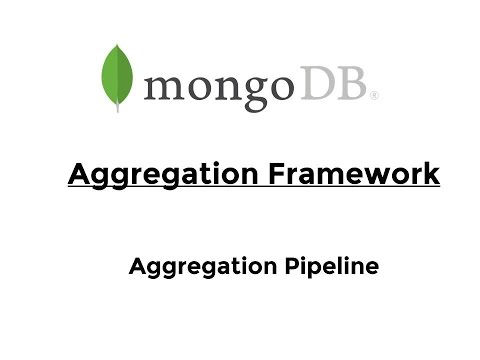

In [39]:
from IPython.display import YouTubeVideo
YouTubeVideo('VSX4a3h4SmQ',width=600)

![](https://miro.medium.com/max/1060/1*2lDBxvZ8Cr3JYkoODTa0lQ.png)

Proyección:

In [ ]:
respuestas = db['posts'].aggregate( [
    {'$project' : { 'Id' : True }},
    {'$limit': 20} ])
list(respuestas)

_Lookup_!

In [ ]:
respuestas = posts.aggregate( [
        {'$match': { 'Score' : {'$gte': 40}}},
        {'$lookup': {
            'from': "users",
            'localField': "OwnerUserId",
            'foreignField': "Id",
            'as': "owner"}
        },
        {"$limit" : 2}
        ])
list(respuestas)

El `$lookup` genera un _array_ con todos los resultados. El operador `$arrayElementAt` accede al primer elemento.

El `$lookup` genera un *array* con todos los resultados. `$unwind` puede usarse para "desdoblar" cada fila por cada elemento del array. En este caso, como sabemos que el array sólo contiene un elemento, sólo habrá una fila por fila original, pero sin el _array_. Finalmente se puede proyectar el campo que se quiera.

In [40]:
respuestas = db.posts.aggregate( [
        { '$match': { 'Score' : {'$gte': 40}}},
        { '$lookup': {
            'from': "users",
            'localField': "OwnerUserId",
            'foreignField': "Id",
            'as': "owner"
          }
        },

        { '$unwind': '$owner'},

        { '$project' : {
             'username': '$owner.DisplayName'
          }
        },
        { '$limit' : 2 }
        ])
list(respuestas)

[{'_id': ObjectId('671bac4ec80749c8b84166e8'), 'username': 'Konamiman'},
 {'_id': ObjectId('671bac4ec80749c8b8416705'), 'username': 'jachguate'}]

### Ejemplo de realización de la consulta RQ4

Como ejemplo de consulta compleja con el Framework de Agregación, adjunto una posible solución a la consulta **RQ4**: "Do people that have questions answered by other people answer questions of those other people?". Esto es, ¿hay algún tipo de relación social en Stackoverflow de manera que si alguien te responde una pregunta intentas responder alguna pregunta suya? Veamos.

Al ser una consulta compleja, la iremos viendo por partes. Lo bueno del Framework de Agregación es que se puede ir viendo paso a paso, y se puede ir depurando. En este caso, la consulta se puede dividir en los siguientes pasos:

En un primer paso, cogemos las respuestas (`PostTypeId` = 2) y encontramos sus correspondientes preguntas (`ParentId`), y nos quedamos con el `OwnerUserId` de la respuesta y el `OwnerUserId` de la pregunta. Esto se puede hacer con un `$lookup` y un `$project`:

In [41]:
RQ4 = db.posts.aggregate( [
        { "$match" : {"PostTypeId": 2}},
        { '$lookup': {
            'from': "posts",
            'localField': "ParentId",
            'foreignField': "Id",
            'as': "question"
          }
        },

        { '$unwind' : '$question' },

        { '$project' : {
            'OwnerUserId': True,
            'OP' : '$question.OwnerUserId'
          }
        },
        {
          '$limit' : 100
        }
    ])
RQ4 = list(RQ4)
RQ4

[{'_id': ObjectId('671bac4ec80749c8b84166e9'), 'OwnerUserId': 23, 'OP': 23},
 {'_id': ObjectId('671bac4ec80749c8b84166eb'), 'OwnerUserId': 24, 'OP': 21},
 {'_id': ObjectId('671bac4ec80749c8b84166ee'), 'OwnerUserId': 25, 'OP': 24},
 {'_id': ObjectId('671bac4ec80749c8b84166f0'), 'OwnerUserId': 21, 'OP': 21},
 {'_id': ObjectId('671bac4ec80749c8b84166f2'), 'OwnerUserId': 23, 'OP': 20},
 {'_id': ObjectId('671bac4ec80749c8b84166f7'), 'OwnerUserId': 24, 'OP': 37},
 {'_id': ObjectId('671bac4ec80749c8b84166f8'), 'OwnerUserId': 24, 'OP': 22},
 {'_id': ObjectId('671bac4ec80749c8b84166fd'), 'OwnerUserId': 25, 'OP': 22},
 {'_id': ObjectId('671bac4ec80749c8b84166ff'), 'OwnerUserId': 24, 'OP': 37},
 {'_id': ObjectId('671bac4ec80749c8b8416702'), 'OwnerUserId': 24, 'OP': 25},
 {'_id': ObjectId('671bac4ec80749c8b8416703'), 'OwnerUserId': 37, 'OP': 29},
 {'_id': ObjectId('671bac4ec80749c8b8416704'), 'OwnerUserId': 23, 'OP': 24},
 {'_id': ObjectId('671bac4ec80749c8b841670a'), 'OwnerUserId': 20, 'OP': 21},

A continuación, cubrimos ciertos casos que se pueden dar. Recuérdese que algunas preguntas no llevaban relleno el `OwnerUserId`, por lo que se deben eliminar. Además, se eliminan los casos en los que el `OwnerUserId` de la pregunta es el mismo que el de la respuesta. Esto se puede hacer con un `$match`:

In [42]:
RQ4 = db.posts.aggregate( [
        { "$match" : {"PostTypeId": 2}},
        { '$lookup': {
            'from': "posts",
            'localField': "ParentId",
            'foreignField': "Id",
            'as': "question"
          }
        },

        { '$unwind' : '$question' },

        { '$project' : {
            'OwnerUserId': True,
            'OP' : '$question.OwnerUserId'
          }
        },
        # Evitar el uso de algún campo nulo, y que el OP no sea el mismo que el OwnerUserId
        { '$match' : { '$and' : [ {'OwnerUserId' : { '$ne' : None}},
                                  {'OP' : { '$ne' : None}},
                                  {'$expr' : { '$ne' : ['$OwnerUserId', '$OP'] }}
                                ]
                      }
        },
        { '$limit' : 100 }
    ])
RQ4 = list(RQ4)
RQ4

[{'_id': ObjectId('671bac4ec80749c8b84166eb'), 'OwnerUserId': 24, 'OP': 21},
 {'_id': ObjectId('671bac4ec80749c8b84166ee'), 'OwnerUserId': 25, 'OP': 24},
 {'_id': ObjectId('671bac4ec80749c8b84166f2'), 'OwnerUserId': 23, 'OP': 20},
 {'_id': ObjectId('671bac4ec80749c8b84166f7'), 'OwnerUserId': 24, 'OP': 37},
 {'_id': ObjectId('671bac4ec80749c8b84166f8'), 'OwnerUserId': 24, 'OP': 22},
 {'_id': ObjectId('671bac4ec80749c8b84166fd'), 'OwnerUserId': 25, 'OP': 22},
 {'_id': ObjectId('671bac4ec80749c8b84166ff'), 'OwnerUserId': 24, 'OP': 37},
 {'_id': ObjectId('671bac4ec80749c8b8416702'), 'OwnerUserId': 24, 'OP': 25},
 {'_id': ObjectId('671bac4ec80749c8b8416703'), 'OwnerUserId': 37, 'OP': 29},
 {'_id': ObjectId('671bac4ec80749c8b8416704'), 'OwnerUserId': 23, 'OP': 24},
 {'_id': ObjectId('671bac4ec80749c8b841670a'), 'OwnerUserId': 20, 'OP': 21},
 {'_id': ObjectId('671bac4ec80749c8b841670e'), 'OwnerUserId': 20, 'OP': 35},
 {'_id': ObjectId('671bac4ec80749c8b841670f'), 'OwnerUserId': 24, 'OP': 21},

A continuación, de las relaciones que hay entre ambos, el usuario que pregunta y el usuario que responde, se agrupan todas, independientemente del tipo de relación. Para ello, se utilizan ambos identificadores y se construye una clave que elige siempre el mínimo y el máximo. Esta selección es siempre la misma independientemente en el orden que estén. Con esa clave, se agrupan todas las relaciones. Esto se puede hacer con un `$project` y un `$group`. En la agruación, además, se construye el atributo `pairs`, que guarda un **conjunto** con todas las relaciones posibles entre los dos usuarios. Si hay más de una vez que uno preguntó y el otro respondió, sólo se guarda una vez. Si hay más de una vez que el otro preguntó y el uno respondió, también se guarda sólo una vez.

In [43]:
RQ4 = db.posts.aggregate( [
        { "$match" : {"PostTypeId": 2}},
        { '$lookup': {
            'from': "posts",
            'localField': "ParentId",
            'foreignField': "Id",
            'as': "question"
          }
        },

        { '$unwind' : '$question' },

        { '$project' : {
            'OwnerUserId': True,
            'OP' : '$question.OwnerUserId'
          }
        },
        # Evitar el uso de algún campo nulo, y que el OP no sea el mismo que el OwnerUserId
        { '$match' : { '$and' : [ {'OwnerUserId' : { '$ne' : None}},
                                  {'OP' : { '$ne' : None}},
                                  {'$expr' : { '$ne' : ['$OwnerUserId', '$OP'] }}
                                ]
                      }
        },
        {
          '$group' : {'_id' : {'min' : { '$min' : ['$OwnerUserId' , '$OP'] },
                               'max' : { '$max' : ['$OwnerUserId' , '$OP'] }},
                      'pairs' : {'$addToSet' : { '0q': '$OP', '1a': '$OwnerUserId'}}
          }
        },
        { '$limit' : 100 }
    ])
RQ4 = list(RQ4)
RQ4

[{'_id': {'min': 5972, 'max': 63995}, 'pairs': [{'0q': 5972, '1a': 63995}]},
 {'_id': {'min': 7123, 'max': 87553}, 'pairs': [{'0q': 87553, '1a': 7123}]},
 {'_id': {'min': 15089, 'max': 171182},
  'pairs': [{'0q': 171182, '1a': 15089}]},
 {'_id': {'min': 95, 'max': 50563}, 'pairs': [{'0q': 50563, '1a': 95}]},
 {'_id': {'min': 3443, 'max': 14375}, 'pairs': [{'0q': 3443, '1a': 14375}]},
 {'_id': {'min': 151077, 'max': 157171},
  'pairs': [{'0q': 157171, '1a': 151077}]},
 {'_id': {'min': 117583, 'max': 212776},
  'pairs': [{'0q': 117583, '1a': 212776}]},
 {'_id': {'min': 29967, 'max': 124779},
  'pairs': [{'0q': 124779, '1a': 29967}]},
 {'_id': {'min': 244186, 'max': 292682},
  'pairs': [{'0q': 292682, '1a': 244186}]},
 {'_id': {'min': 79010, 'max': 118358},
  'pairs': [{'0q': 79010, '1a': 118358}]},
 {'_id': {'min': 95, 'max': 227013}, 'pairs': [{'0q': 227013, '1a': 95}]},
 {'_id': {'min': 16285, 'max': 120233},
  'pairs': [{'0q': 120233, '1a': 16285}]},
 {'_id': {'min': 12625, 'max': 259

Finalmente, se cuenta el número de relaciones que hay en el conjunto `pairs`. Si es mayor que 1, es que hay una relación social. Esto se puede hacer con un `$project` y un `$match`.

In [30]:
RQ4 = db.posts.aggregate( [
        { "$match" : {"PostTypeId": 2}},
        { '$lookup': {
            'from': "posts",
            'localField': "ParentId",
            'foreignField': "Id",
            'as': "question"
          }
        },

        { '$unwind' : '$question' },

        { '$project' : {
            'OwnerUserId': True,
            'OP' : '$question.OwnerUserId'
          }
        },
        # Evitar el uso de algún campo nulo, y que el OP no sea el mismo que el OwnerUserId
        { '$match' : { '$and' : [ {'OwnerUserId' : { '$ne' : None}},
                                  {'OP' : { '$ne' : None}},
                                  {'$expr' : { '$ne' : ['$OwnerUserId', '$OP'] }}
                                ]
                      }
        },
        {
          '$group' : {'_id' : {'min' : { '$min' : ['$OwnerUserId' , '$OP'] },
                               'max' : { '$max' : ['$OwnerUserId' , '$OP'] }},
                      'pairs' : {'$addToSet' : { '0q': '$OP', '1a': '$OwnerUserId'}}
          }
        },
        {
          '$project': {
            'pairs' : True,
            'npairs' : { '$size' : '$pairs'}
          }
        },
        {
          '$match' : { 'npairs' : { '$eq' : 2}}
        },
        {
          '$group' : {'_id': None,  'count': {'$sum' : 1}} 
        },
    ])
RQ4 = list(RQ4)
RQ4

[{'_id': None, 'count': 216}]

La explicación es como sigue:

1. Se eligen sólo las respuestas
2. Se accede a la tabla `posts` para recuperar los datos de la pregunta
3. A continuación se proyectan sólo el usuario que pregunta y el que hace la respuesta
4. El paso más imaginativo es el de agrupación. Lo que se intenta es que ambos pares de usuarios que están relacionados como preguntante -> respondiente y viceversa, caigan en la misma clave. Por ello, se coge el máximo y el mínimo de ambos identificadores de usuarios y se construye una clave con ambos números en las mismas posiciones. Así, ambas combinaciones de usuario que pregunta y que responde caerán en la misma clave. También se usa un conjunto (en `pairs`), y sólo se añadirá una vez las posibles combinaciones iguales de preguntador/respondiente.
5. Sólo nos interesan aquellas tuplas cuyo tamaño del conjunto de pares de pregunta/respuesta sea igual a dos (en un elemento uno de los dos usuarios habrá preguntado y el otro habrá respondido y en el otro viceversa).

En el caso de que queramos tener como referencia las preguntas y respuestas a las que se refiere la conversación, se puede añadir un campo más que guarde todas las preguntas junto con sus respuestas consideradas

In [31]:
RQ4 = db.posts.aggregate( [
        { '$match': { 'PostTypeId' : 2}},
        { '$lookup': {
            'from': "posts",
            'localField': "ParentId",
            'foreignField': "Id",
            'as': "question"
          }
        },

        { '$unwind' : '$question' },

        { '$project' : {
            'OwnerUserId': True,
            'QId' : '$question.Id',
            'AId' : '$Id',
            'OP' : '$question.OwnerUserId'
          }
        },
        # Evitar el uso de algún campo nulo, y que el OP no sea el mismo que el OwnerUserId
        { '$match' : { '$and' : [ {'OwnerUserId' : { '$ne' : None}},
                                  {'OP' : { '$ne' : None}},
                                  {'$expr' : { '$ne' : ['$OwnerUserId', '$OP'] }}
                                ]
                      }
        },
        {
          '$group' : {'_id' : {'min' : { '$min' : ['$OwnerUserId' , '$OP'] },
                               'max' : { '$max' : ['$OwnerUserId' , '$OP'] }},
                      'pairs' : {'$addToSet' : { '0q':'$OP', '1a': '$OwnerUserId'}},
                      'considered_pairs' : { '$push' : {'QId' : '$QId', 'AId' : '$AId'}}
          }
        },
        { '$project': {
            'pairs' : True,
            'npairs' : { '$size' : '$pairs'},
            'considered_pairs' : True
          }
        },
        { '$match' : { 'npairs' : { '$eq' : 2}} }
    ])
RQ4 = list(RQ4)
RQ4

[{'_id': {'min': 21, 'max': 1184},
  'pairs': [{'0q': 21, '1a': 1184}, {'0q': 1184, '1a': 21}],
  'considered_pairs': [{'QId': 2615, 'AId': 2619},
   {'QId': 36, 'AId': 47441},
   {'QId': 4630, 'AId': 446773}],
  'npairs': 2},
 {'_id': {'min': 22, 'max': 288},
  'pairs': [{'0q': 288, '1a': 22}, {'0q': 22, '1a': 288}],
  'considered_pairs': [{'QId': 565, 'AId': 604}, {'QId': 731, 'AId': 734}],
  'npairs': 2},
 {'_id': {'min': 22, 'max': 342},
  'pairs': [{'0q': 22, '1a': 342}, {'0q': 342, '1a': 22}],
  'considered_pairs': [{'QId': 618, 'AId': 623}, {'QId': 552, 'AId': 832}],
  'npairs': 2},
 {'_id': {'min': 22, 'max': 729},
  'pairs': [{'0q': 22, '1a': 729}, {'0q': 729, '1a': 22}],
  'considered_pairs': [{'QId': 2454, 'AId': 2459}, {'QId': 1919, 'AId': 2734}],
  'npairs': 2},
 {'_id': {'min': 23, 'max': 25},
  'pairs': [{'0q': 25, '1a': 23}, {'0q': 23, '1a': 25}],
  'considered_pairs': [{'QId': 48, 'AId': 52},
   {'QId': 803, 'AId': 805},
   {'QId': 1015, 'AId': 1095}],
  'npairs': 2},


In [32]:
(db.posts.find_one({'Id': 238}), db.posts.find_one({'Id': 243}),
db.posts.find_one({'Id': 222}), db.posts.find_one({'Id': 223}))

({'_id': ObjectId('671bb2810bdcdd16100e4a09'),
  'Id': 238,
  'AcceptedAnswerId': 243,
  'AnswerCount': 1,
  'Body': "<p>Estoy observando un mensaje de alerta (no es un error) <code>InsecurePlatformWarning</code> al ejecutar el comando <code>pip</code> en Linux:</p><br/><br/><pre><code>$ pip search reportlab<br/>/usr/local/lib/python2.7/dist-packages/pip/_vendor/requests/packages/urllib3/util/ssl_.py:90:<br/>         InsecurePlatformWarning: A true SSLContext object is not available.<br/>         This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail.<br/>         For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.<br/>  InsecurePlatformWarning<br/>reportlab           - The ReportLab Toolkit<br/></code></pre><br/><br/><p>Tengo instalada la última versión de <code>pip</code>:</p><br/><br/><pre><code>$ pip show pip<br/>---<br/>Metadata-Version: 2.0<br/>Name: pip<br/>Version: 7.1.2<br/>S

### Ejemplo de consulta: Tiempo medio desde que se hace una pregunta hasta que se le da la primera respuesta

Veamos cómo calcular el tiempo medio desde que se hace una pregunta hasta que se le da la primera respuesta. No se considerarán pues las preguntas que no tienen respuesta, lo cual es razonable.

Esto sólo calcula el tiempo mínimo de cada pregunta a su respuesta. Después se añadirá el código que calcula la media final:

In [36]:
min_answer_time = db.posts.aggregate([
    { "$match" : {"PostTypeId" : 2} },
    { '$group' : {
        '_id' : '$ParentId',
        # 'answers' : { '$push' : {'Id' : "$Id", 'CreationDate' : "$CreationDate"}},
        'min' : {'$min' : "$CreationDate"}
      }
    },
    { "$lookup" : {
        'from': "posts",
        'localField': "_id",
        'foreignField': "Id",
        'as': "post"}
    },
    { "$unwind" : "$post"},
    { "$project" : {
        "_id" : True,
        "min" : True,
        #"post" : True,
        "diff" : {"$subtract" : ["$min", "$post.CreationDate"]}
      }
    },
    #    { "$sort" : {'_id' : 1} },
    #{
    #  "$group" :  {
    #    "_id" : None,
    #    "avg" : { "$avg" : "$diff"}
    #  }
    #}
    { "$limit" : 10}
])
min_answer_time = list(min_answer_time)
min_answer_time

[{'_id': 165195,
  'min': datetime.datetime(2018, 5, 17, 12, 40, 33, 530000),
  'diff': 4610857},
 {'_id': 345422,
  'min': datetime.datetime(2020, 4, 13, 16, 19, 15, 303000),
  'diff': 97883816},
 {'_id': 172069,
  'min': datetime.datetime(2018, 6, 10, 9, 25, 3, 87000),
  'diff': 16408450},
 {'_id': 597406,
  'min': datetime.datetime(2023, 6, 25, 2, 22, 26, 7000),
  'diff': 8322610},
 {'_id': 467852,
  'min': datetime.datetime(2021, 7, 14, 11, 16, 8, 457000),
  'diff': 432537744},
 {'_id': 314319,
  'min': datetime.datetime(2019, 12, 6, 15, 33, 0, 57000),
  'diff': 2457630},
 {'_id': 201588,
  'min': datetime.datetime(2018, 10, 3, 18, 17, 22, 540000),
  'diff': 10883803},
 {'_id': 362708,
  'min': datetime.datetime(2020, 6, 5, 19, 24, 50, 70000),
  'diff': 550420},
 {'_id': 373127,
  'min': datetime.datetime(2020, 7, 13, 14, 38, 56, 220000),
  'diff': 2219673},
 {'_id': 100922,
  'min': datetime.datetime(2017, 9, 8, 17, 40, 27, 493000),
  'diff': 628686},
 {'_id': 184850,
  'min': dat

In [37]:
df = pd.json_normalize(min_answer_time)
df.index=df["_id"]
df

,_id,min,diff
_id,,,
165195,165195,2018-05-17 12:40:33.530,4610857
345422,345422,2020-04-13 16:19:15.303,97883816
172069,172069,2018-06-10 09:25:03.087,16408450
597406,597406,2023-06-25 02:22:26.007,8322610
467852,467852,2021-07-14 11:16:08.457,432537744
...,...,...,...
247332,247332,2019-03-20 19:00:16.713,6328263
340268,340268,2020-03-27 20:39:29.983,1492370
419988,419988,2021-01-11 15:52:20.777,211190


In [ ]:
df['diff'].plot(kind='bar')

<Axes: xlabel='_id'>

La siguiente consulta sí calcula el mínimo:

In [ ]:
avg_answer_time = db.posts.aggregate([
    { "$match" : {"PostTypeId" : 2} },
    { '$group' : {
        '_id' : '$ParentId',
        # 'answers' : { '$push' : {'Id' : "$Id", 'CreationDate' : "$CreationDate"}},
        'min' : {'$min' : "$CreationDate"}
      }
    },
    { "$lookup" : {
        'from': "posts",
        'localField': "_id",
        'foreignField': "Id",
        'as': "post"}
    },
    { "$unwind" : "$post"},
    { "$project" : {
        "_id" : True,
        "min" : True,
        #"post" : True,
        "diff" : {"$subtract" : ["$min", "$post.CreationDate"]}
      }
    },
    #    { "$sort" : {'_id' : 1} }
    {
      "$group" :  {
        "_id" : None,
        "avg" : { "$avg" : "$diff"}
      }
    }
])
avg_answer_time = list(avg_answer_time)
avg_answer_time

## EJERCICIO 1: Con Agregación, construir las colecciones que asocian un usuario con las preguntas que ha hecho de cada tag (dado como su ID de tag) y dado un ID de tag, qué usuarios han hecho preguntas de ese tag (E1).

## EJERCICIO 2: Con el Framework de Agregación, generar la colección `StackOverflowFacts` vista en la sesión 2 (E2).

## EJERCICIO 3: Con Agregación implementar la consulta RQ3 de la sesión 2.

## EJERCICIO 4: Con Agregación, calcular, en la tabla `StackOverflowFacts` la media de tiempo que pasa desde que los usuarios se registran hasta que publican su primera pregunta.

## EJERCICIO 4: Con Agregación, calcular, en la tabla `StackOverflowFacts` la media de tiempo que pasa desde que se hace una pregunta hasta que se recibe la primera respuesta (ignorar las preguntas sin respuesta), y también desde la pregunta hasta la respuesta aceptada (de nuevo, si no tiene respuesta aceptada, se ignora esa pregunta)